# Tareas y ejercicios del tema 2

In [11]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8") # principlamente para mostrar tildes en las gráficas

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

## Ejercicio 2

In [61]:
library(readxl)
library(dplyr)

compras <- read_excel("./Datos/MO_dataset_compras.xlsx")

# eliminar columnas que contengan "Precio", "ID" o "TIPO"
compras_filtradas <- compras %>% 
    select(-contains("Precio"), -"ID COMPRA", -contains("TIPO")) %>% 
    filter(`ID CLIENTE` %in% c(130, 160))


head(compras_filtradas)

ID CLIENTE,Leche Pascual,Leche FROIZ,Pan,Mantequilla,Cerveza,Lechuga,Filetes Ternera (pack 1 kg),Filetes Cerdo (pack 1 kg),Pizza Tarradellas,Pizza FROIZ
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0,6,1,1,6,0,0,0,1,0
160,6,0,2,0,0,1,1,0,4,0


In [62]:
compras_filtradas <- compras_filtradas %>%
  mutate(total = rowSums(select(., -`ID CLIENTE`), na.rm = TRUE)) %>%
  mutate(across(-c(`ID CLIENTE`, total), ~ . / total)) %>%
  select(-total)

head(compras_filtradas)

ID CLIENTE,Leche Pascual,Leche FROIZ,Pan,Mantequilla,Cerveza,Lechuga,Filetes Ternera (pack 1 kg),Filetes Cerdo (pack 1 kg),Pizza Tarradellas,Pizza FROIZ
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130,0.0000000,0.4,0.06666667,0.06666667,0.4,0.00000000,0.00000000,0,0.06666667,0
160,0.4285714,0.0,0.14285714,0.00000000,0.0,0.07142857,0.07142857,0,0.28571429,0


A contestar:
- A partir de los vectores anteriores, para cada usuario, crea una oferta de descuento personalizada.
- A partir de las preferencias aprendidas para estos dos usuarios, y de los datos que observas en el dataset: ¿qué recomendaciones harías a la gerencia del supermercado para organizar la ubicación de los productos?

## Ejercicio 3

In [ ]:
if (!require("recommenderlab")) {
  install.packages("recommenderlab")
}

## Ejercicio 4

In [2]:
library(recommenderlab)

### Sección 5.4

Veamos primero la estructura del dataset, concretamente las dimensiones, un resumen estadístico y la proporción de valores nulos o faltantes en el dataset total.

In [ ]:
data(Jester5k)

cat("Dimensiones del dataset:\n")
dim(Jester5k)

cat("\nResumen estadístico:\n")
summary(Jester5k)

cat("\nProporción de valores faltantes:\n")
mean(is.na(as(Jester5k, "matrix")))

# stats de ratings por usuarios
ratings_por_usuario <- rowCounts(Jester5k)
cat("\nStats de ratings por usuario:\n")
summary(ratings_por_usuario)

# stats de ratings por chiste
ratings_por_chiste <- colCounts(Jester5k)
cat("\nStats de ratings por chiste:\n")
summary(ratings_por_chiste)

# distribución de ratings
hist(getRatings(Jester5k), main="Distribución de Ratings", 
     xlab="Rating", ylab="Frecuencia", breaks=20)

Dimensiones del dataset:


[1] 5000  100


Resumen estadístico:


          Length            Class             Mode 
               1 realRatingMatrix               S4 


Proporción de valores faltantes:


[1] 0.273582

Ahora, sigamos con un análisis exploratorio de los datos, veremos estadísticas para ratings por usuarios y por chistes


Stats de ratings por usuario:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  36.00   53.00   72.00   72.64  100.00  100.00 


Stats de ratings por chiste:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1732    2082    3971    3632    4957    5000 

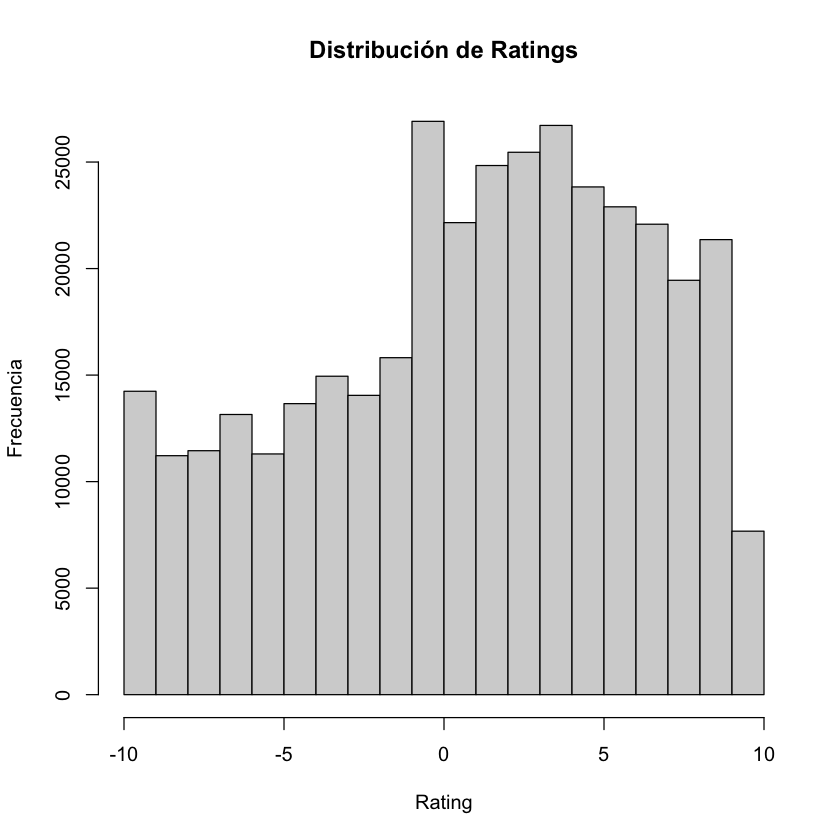

In [19]:
# stats de ratings por usuarios
ratings_por_usuario <- rowCounts(Jester5k)
cat("\nStats de ratings por usuario:\n")
summary(ratings_por_usuario)

# stats de ratings por chiste
ratings_por_chiste <- colCounts(Jester5k)
cat("\nStats de ratings por chiste:\n")
summary(ratings_por_chiste)

# distribución de ratings
hist(getRatings(Jester5k), main="Distribución de Ratings", 
     xlab="Rating", ylab="Frecuencia", breaks=20)

Usuarios que aportan más ratings:
 [1]  1  2  5  9 10 14 16 17 19 22

Chistes más valorados:
 [1]  5  8 15 17 18 19  7 13 20 50


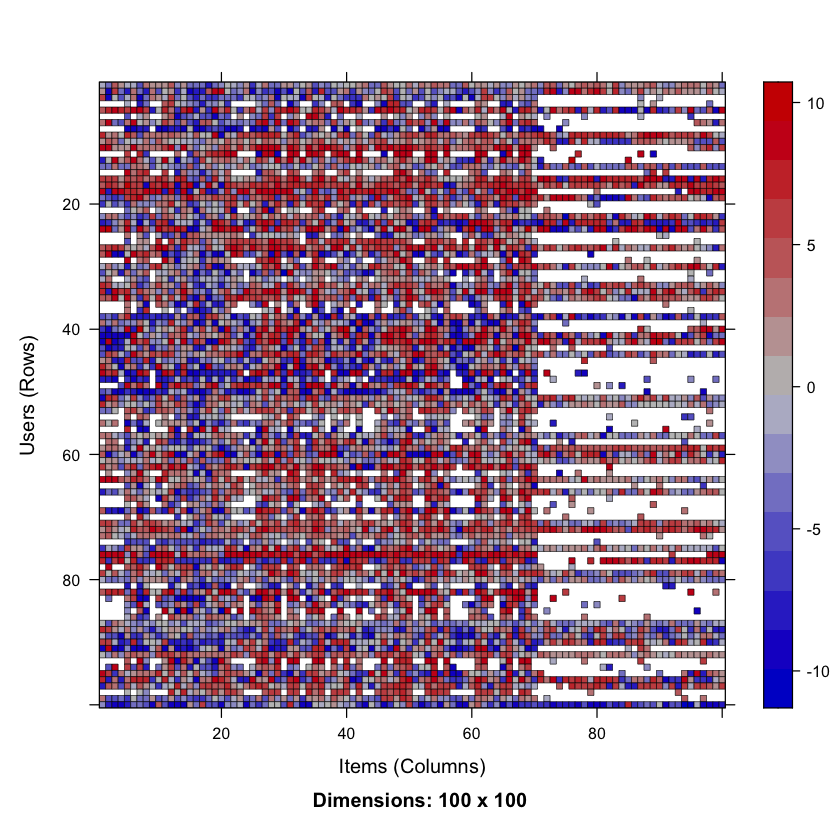

In [21]:
image(Jester5k[1:100, 1:100])

# ratings_por_usuario <- rowCounts(Jester5k)
top_users <- order(ratings_por_usuario, decreasing = TRUE)[1:10]
cat("Usuarios que aportan más ratings:\n")
print(top_users)

# ratings_por_chiste <- colCounts(Jester5k)
top_jokes <- order(ratings_por_chiste, decreasing = TRUE)[1:10]
cat("\nChistes más valorados:\n")
print(top_jokes)

### Sección 5.5

Ahora, hacemos un recomendador siguiendo las indicaciones del tutorial.

In [47]:
recom_completo <- Recommender(Jester5k, method = "POPULAR")
recom <- predict(recom_completo, Jester5k[1001:1002], n=5)
recom_rate  <- predict(recom_completo, Jester5k[1001:1002], type="ratings")
print(as(recom, "list"))
print(as(recom_rate, "matrix")[,1:10])

$u15553
[1] "j89" "j72" "j93" "j76" "j88"

$u7886
[1] "j89" "j72" "j93" "j76" "j88"

             j1       j2       j3       j4 j5 j6 j7 j8       j9 j10
u15553       NA       NA       NA       NA NA NA NA NA       NA  NA
u7886  3.599168 2.806417 2.897614 0.989363 NA NA NA NA 2.037474  NA


Hacemos otra versión del recomendador solo con los 100 primeros usuarios

In [48]:
Jester_100 <- Jester5k[1:100]
recom_100 <- Recommender(Jester_100, method = "POPULAR")
recom_100_pred <- predict(recom_100, Jester5k[1001:1002], n=5)
recom_rate100  <- predict(recom_100, Jester5k[1001:1002], type="ratings")
print(as(recom_100_pred, "list"))
print(as(recom_rate100, "matrix")[,1:10])

$u15553
[1] "j89" "j72" "j76" "j87" "j93"

$u7886
[1] "j89" "j72" "j76" "j87" "j93"

             j1       j2       j3       j4 j5 j6 j7 j8       j9 j10
u15553       NA       NA       NA       NA NA NA NA NA       NA  NA
u7886  3.539262 3.068481 3.000976 0.446442 NA NA NA NA 1.801267  NA


En general las recomendaciones son similares, pero no suelen seguir el mismo orden. En ambos casos, el recomendador completo menciona el chiste 88, mientras que el que solo usa los primeros 100 usuarios menciona el chiste 87.


### Secciones 5.6

Creamos un esquema de evaluación que determina qué datos y cómo se usan para el entrenamiento y la evaluación. 

In [49]:
e <- evaluationScheme(Jester5k[1:1000], method="split", train=0.9, given=15, goodRating=5)
e

Evaluation scheme with 15 items given
Method: ‘split’ with 1 run(s).
Training set proportion: 0.900
Good ratings: >=5.000000
Data set: 1000 x 100 rating matrix of class ‘realRatingMatrix’ with 74164 ratings.

Creamos dos recomendadores, uno basado en usuarios y otro en ítems, usando los datos de entrenamiento.

In [51]:
r1 <- Recommender(getData(e, "train"), "UBCF")
r1

r2 <- Recommender(getData(e, "train"), "IBCF")
r2

Recommender of type ‘UBCF’ for ‘realRatingMatrix’ 
learned using 900 users.

Recommender of type ‘IBCF’ for ‘realRatingMatrix’ 
learned using 900 users.

Ahora, calculamos los ratings predichos para los datos de test en ambos algoritmos

In [53]:
p1 <- predict(r1, getData(e, "known"), type="ratings")
p1

p2 <- predict(r2, getData(e, "known"), type="ratings")
p2

100 x 100 rating matrix of class ‘realRatingMatrix’ with 8501 ratings.

100 x 100 rating matrix of class ‘realRatingMatrix’ with 8271 ratings.

Calculamos el error entre la predicción y la parte desconocida de los datos de test.

In [54]:
error <- rbind(calcPredictionAccuracy(p1, getData(e, "unknown")), calcPredictionAccuracy(p2, getData(e, "unknown")))
rownames(error) <- c("UBCF","IBCF")
error

,RMSE,MSE,MAE
UBCF,4.429889,19.62392,3.462585
IBCF,4.425562,19.58560,3.387248


### Sección 5.7

Creamos primero un esquema de validación cruzada de 4 pliegues para los usuarios de test, manteniendo 3 items aleatorios para evaluación.

In [55]:
scheme <- evaluationScheme(Jester5k[1:1000], method="cross", k=4, given=3, goodRating=5)
scheme

Evaluation scheme with 3 items given
Method: ‘cross-validation’ with 4 run(s).
Good ratings: >=5.000000
Data set: 1000 x 100 rating matrix of class ‘realRatingMatrix’ with 74164 ratings.

Ahora creamos un esquema para evaluar el recomendador que usa el método popular. Concretamente, evaluamos el top 1, 3, 4, 10, 15 y 20.

In [57]:
results <- evaluate(scheme, method="POPULAR", n=c(1,3,5,10,15,20))
results

POPULAR run fold/sample [model time/prediction time]
	 1  [0.003sec/0.065sec] 
	 2  [0.002sec/0.051sec] 
	 3  [0.001sec/0.054sec] 
	 4  [0.002sec/0.054sec] 


Evaluation results for 4 folds/samples using method ‘POPULAR’.

Veamos ahora el primer elemento de la matriz de confusión generada, que corresponde a la primera ejecución de las 4 de la validación cruzada.

In [58]:
getConfusionMatrix(results)[[1]]

TP,FP,FN,TN,N,precision,recall,TPR,FPR,n
0.396,0.560,16.428,79.652,97.036,0.4142259,0.02772849,0.02772849,0.006961652,1
1.168,1.700,15.656,78.512,97.036,0.4072524,0.09011776,0.09011776,0.020440418,3
1.840,2.940,14.984,77.272,97.036,0.3849372,0.13494735,0.13494735,0.035207440,5
3.528,6.032,13.296,74.180,97.036,0.3690377,0.25385929,0.25385929,0.072448109,10
5.024,9.316,11.800,70.896,97.036,0.3503487,0.35248343,0.35248343,0.111990651,15
6.288,12.832,10.536,67.380,97.036,0.3288703,0.42509598,0.42509598,0.154442542,20


## Ejercicio 5

The 100k MovieLense ratings data set. The data was collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998. The data set contains about 100,000 ratings (1-5) from 943 users on 1664 movies. Movie and user metadata is also provided in MovieLenseMeta and MovieLenseUser.

In [64]:
data(MovieLense)

cat("Dimensiones del dataset:\n")
dim(MovieLense)

cat("\nResumen estadístico:\n")
summary(MovieLense)

cat("\nProporción de valores faltantes:\n")
mean(is.na(as(MovieLense, "matrix")))

Dimensiones del dataset:


[1]  943 1664


Resumen estadístico:


          Length            Class             Mode 
               1 realRatingMatrix               S4 


Proporción de valores faltantes:


[1] 0.9366588

Stats ratings por usuario:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   19.0    32.0    64.0   105.4   147.5   735.0 


Stats ratings por película:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   27.00   59.73   80.00  583.00 

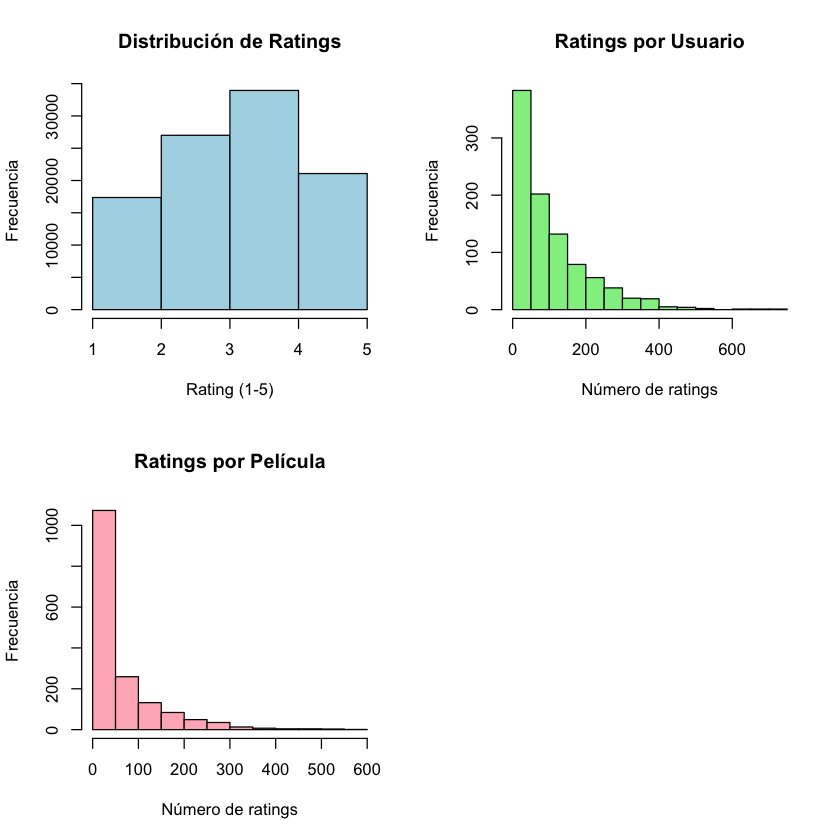

In [68]:
# Por usuario
ratings_usuario <- rowCounts(MovieLense)
cat("Stats ratings por usuario:\n")
summary(ratings_usuario)

# Por película
ratings_pelicula <- colCounts(MovieLense)
cat("\nStats ratings por película:\n")
summary(ratings_pelicula)

par(mfrow=c(2,2))

# Histograma de ratings
hist(getRatings(MovieLense), 
     main="Distribución de Ratings",
     xlab="Rating (1-5)",
     ylab="Frecuencia",
     breaks=5,
     col="lightblue")

# Histograma de ratings por usuario
hist(ratings_usuario,
     main="Ratings por Usuario",
     xlab="Número de ratings",
     ylab="Frecuencia",
     col="lightgreen")

# Histograma de ratings por película
hist(ratings_pelicula,
     main="Ratings por Película",
     xlab="Número de ratings",
     ylab="Frecuencia",
     col="lightpink")

Este dataset presenta mucha mayor cantidad de datos nulos, y la distribución de ratings sigue una *powerlaw*, tanto en ratings por película como por usuario.

In [71]:
scheme <- evaluationScheme(MovieLense, method="split", train=0.9, k=1, 
                           given=20, goodRating=4)

scheme

Warning message in .local(data, ...):
“Dropping these users from the evaluation since they have fewer rating than specified in given!
These users are 19, 36, 140, 242, 300, 302, 309, 364, 475, 812, 824, 866, 873, 926”


Evaluation scheme with 20 items given
Method: ‘split’ with 1 run(s).
Training set proportion: 0.900
Good ratings: >=4.000000
Data set: 929 x 1664 rating matrix of class ‘realRatingMatrix’ with 99126 ratings.

Definimos los algoritmos para evaluar

In [77]:
algoritmos <- list(
    "items aleatorios" = list(name="RANDOM", param=NULL),
    "items populares" = list(name="POPULAR", param=NULL),
    "CF basado en usuarios" = list(name="UBCF", param=list(method="Cosine", nn=50))
)

In [78]:
resultados <- evaluate(scheme, algoritmos, n=c(1, 3, 5, 10, 15, 20))

RANDOM run fold/sample [model time/prediction time]
	 1  [0.003sec/0.035sec] 
POPULAR run fold/sample [model time/prediction time]
	 1  [0.003sec/0.083sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.002sec/0.376sec] 


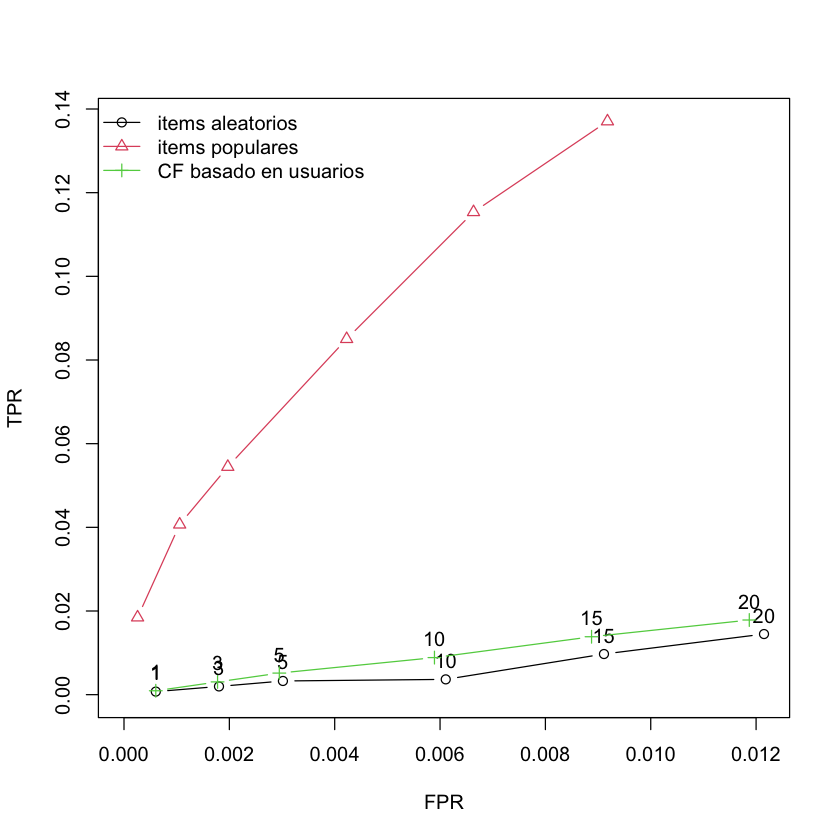

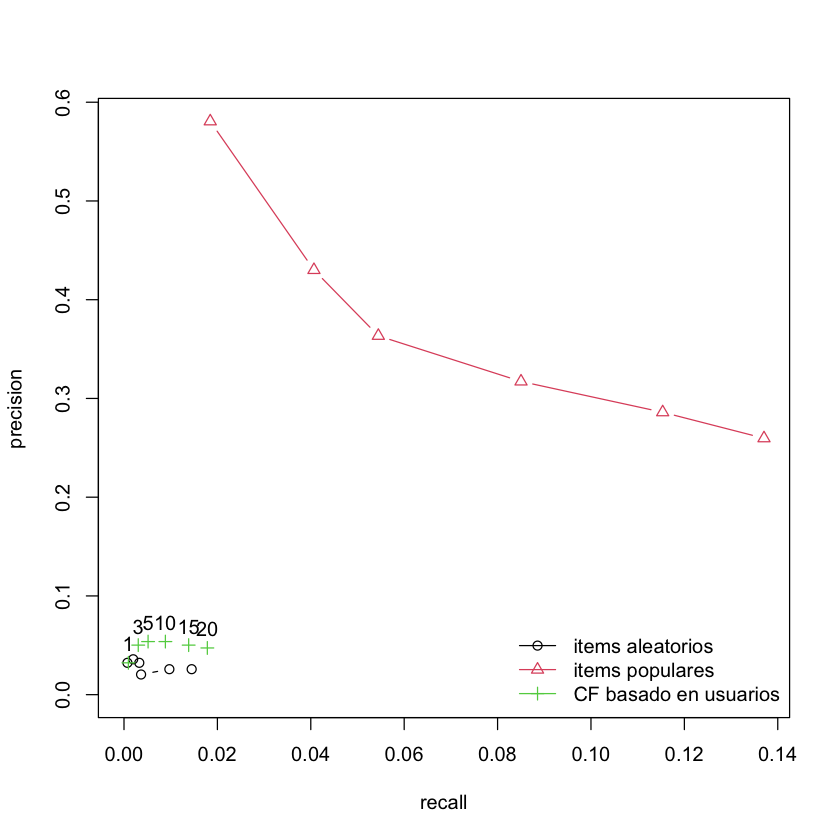

In [84]:
plot(resultados, annotate=c(1,3), legend="topleft", main="Curva ROC")

# Precision-Recall
plot(resultados, "prec/rec", annotate=3, main="Precisión-Recall")